In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [7]:
# Read data
pdata = pd.read_csv("wine.csv", sep=';')
pdata.head()


,Alcohol,MalicAcid,Flavanoids,Magnesium,Alcalinity,Proanthocyanins,Wine
0,10.96,1.68,3.07,84,11.91,2.47,0
1,11.57,2.83,3.35,131,11.82,4.07,0
2,8.44,2.39,2.41,69,10.69,0.94,0
3,11.96,3.34,2.77,139,11.13,4.46,0
4,10.26,1.23,3.73,105,12.28,2.76,0


In [9]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
Alcohol            120 non-null float64
MalicAcid          120 non-null float64
Flavanoids         120 non-null float64
Magnesium          120 non-null int64
Alcalinity         120 non-null float64
Proanthocyanins    120 non-null float64
Wine               120 non-null int64
dtypes: float64(5), int64(2)
memory usage: 6.6 KB


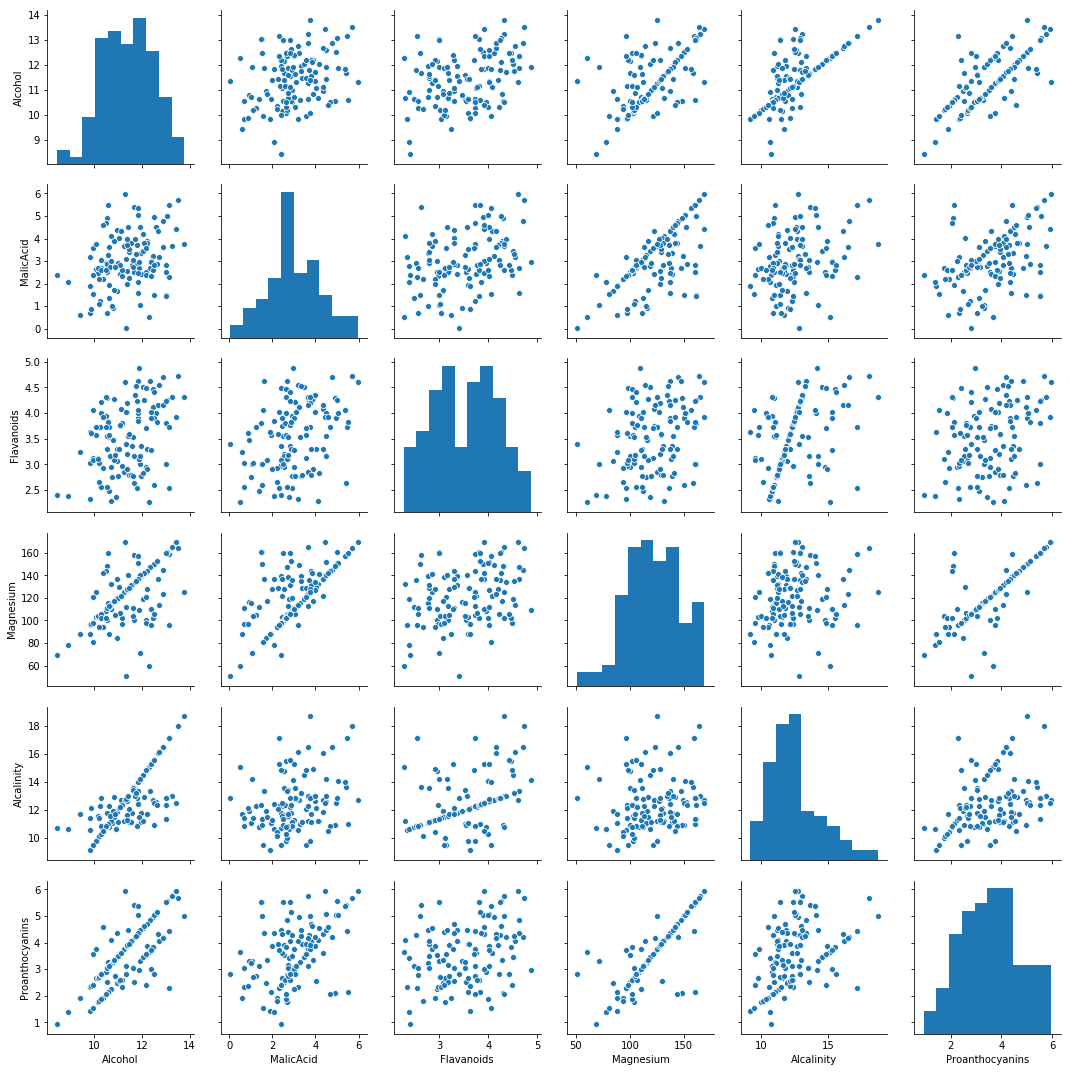

<Figure size 432x288 with 0 Axes>

In [27]:
import seaborn as sns

sns.pairplot(pdata.iloc[:,0:6])
plt.show()
plt.clf()

In [28]:
# Split the data
trainingdata, testdata = train_test_split(pdata, test_size=0.30, random_state=2)
X_train, Y_train = trainingdata.iloc[:, 0:-1], trainingdata.iloc[:, -1]
X_test, Y_test = testdata.iloc[:, 0:-1], testdata.iloc[:, -1]


In [36]:
# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
# Apply classifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.92      0.85      0.88        13

   micro avg       0.92      0.92      0.92        36
   macro avg       0.92      0.90      0.91        36
weighted avg       0.92      0.92      0.92        36



In [41]:
# Apply PCA
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
X_train.shape
pca.explained_variance_ratio_
pca.components_

array([[ 0.46402698,  0.36767902,  0.29361944,  0.40568863,  0.31248688,
         0.54867787],
       [ 0.09363477, -0.14399023,  0.72686192, -0.36491487,  0.43307473,
        -0.34850325],
       [ 0.51523563, -0.46859893, -0.50542004, -0.24587488,  0.43879536,
         0.08063522],
       [ 0.05089568, -0.71022614,  0.35637074,  0.0972963 , -0.4294598 ,
         0.41483258],
       [ 0.58438252, -0.03451719,  0.03618907,  0.41714196, -0.33597579,
        -0.60754328],
       [ 0.4078608 ,  0.3447918 ,  0.04123351, -0.67699736, -0.4742799 ,
         0.17263006]])

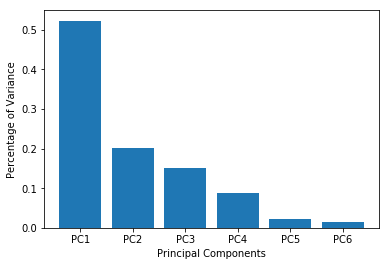

In [32]:
# Plot variance ratio
variance = pca.explained_variance_ratio_
xticks = list(range(len(variance)))
plt.bar(xticks, variance)
plt.xticks(xticks, ['PC' + str(i+1) for i in xticks])
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance')
plt.show()


In [39]:
# Transform data
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)


In [40]:
# Apply classifier using first 4 PCs
PCs = 4
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train_transformed[:, :PCs], Y_train)
Y_pred = model.predict(X_test_transformed[:, :PCs])
print(classification_report(Y_test, Y_pred))



              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.92      0.85      0.88        13

   micro avg       0.92      0.92      0.92        36
   macro avg       0.92      0.90      0.91        36
weighted avg       0.92      0.92      0.92        36

